In [204]:
#libraries 
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [205]:
df = pd.read_csv("NEWfinal2.0.csv", encoding = "unicode_escape" )

In [206]:
df.head()

,FGC OUTLET GAS TEMP,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP
0,°C,27.58,27.58,65.39,°C,2.41,340.52,94.27,168.22,26.09,36.29
1,27.58,27.39,27.39,65.58,97.12,2.41,341.95,94.3,168.92,27.43,36.2
2,27.39,27.59,27.59,65.43,99.59,2.4,339.89,94.29,168.18,26.01,35.32
3,27.59,28.11,28.11,65.46,97.03,2.33,338.7,94.03,167.7,25.11,36.4
4,28.11,28.6,28.6,65.09,95.6,2.37,339,94.3,167,25.29,36.3


In [207]:
df.isnull().sum()

FGC OUTLET GAS TEMP                 82
BENZOL WASHER INLET GAS TEMP         0
BENZOL WASHER  INLET OIL TEMP        0
RICH OIL FLOW(M3/hr)                 0
DISTILLATION COLUMN MIDDLE TEMP     82
STEAM FLOW TO REGENERATOR (T/hr)     0
STEAM TEMP TO REGENERTOR             0
DISTILLATION COLUMN TOP TEMP         0
DISTILLATION COLUMN BOTTOM TEMP      0
PRODUCTION (TON)                     0
PRODUCT TEMP                         0
dtype: int64

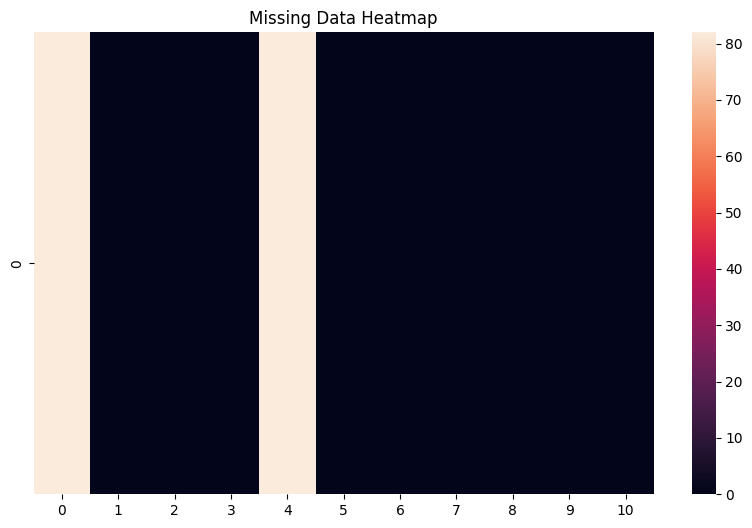

In [208]:
# Assuming df is your DataFrame
data = df.isnull().sum().values.reshape(1, -1)  # Reshape to a 2D matrix

plt.figure(figsize=(10, 6))
sns.heatmap(data)
plt.title('Missing Data Heatmap')
plt.show()


In [209]:
column_name = "FGC OUTLET GAS TEMP"

# Convert the column to numeric and handle non-numeric values
df[column_name] = pd.to_numeric(df[column_name], errors='coerce')

# Calculate the mean and fill missing values with it
mean = df[column_name].mean()
df[column_name].fillna(mean, inplace=True)




In [210]:
column_name1 = "DISTILLATION COLUMN MIDDLE TEMP"

# Convert the column to numeric and handle non-numeric values
df[column_name1] = pd.to_numeric(df[column_name1], errors='coerce')

# Calculate the mean and fill missing values with it
mean1 = df[column_name1].mean()
df[column_name1].fillna(mean1, inplace=True)

In [211]:
df.isnull().sum()

FGC OUTLET GAS TEMP                 0
BENZOL WASHER INLET GAS TEMP        0
BENZOL WASHER  INLET OIL TEMP       0
RICH OIL FLOW(M3/hr)                0
DISTILLATION COLUMN MIDDLE TEMP     0
STEAM FLOW TO REGENERATOR (T/hr)    0
STEAM TEMP TO REGENERTOR            0
DISTILLATION COLUMN TOP TEMP        0
DISTILLATION COLUMN BOTTOM TEMP     0
PRODUCTION (TON)                    0
PRODUCT TEMP                        0
dtype: int64

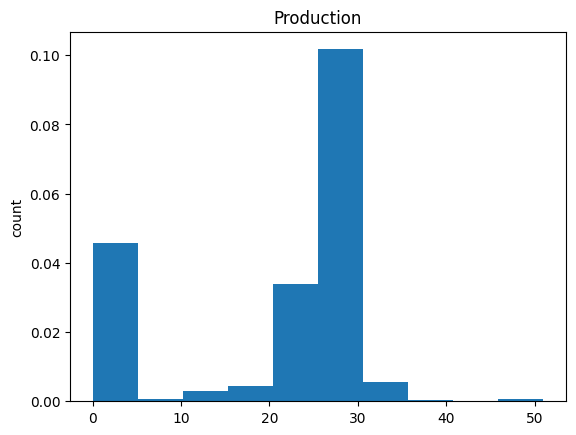

In [212]:
plt.hist(df["PRODUCTION (TON)"],density = True)
plt.title("Production")
plt.ylabel("count")
plt.show()


In [213]:
# Assuming df is your DataFrame
df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
df.corr()

,FGC OUTLET GAS TEMP,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP
FGC OUTLET GAS TEMP,1.000000,0.662367,0.050873,0.020749,0.057912,-0.474070,0.606269,-0.659095,0.513651,0.536683,0.539002
BENZOL WASHER INLET GAS TEMP,0.662367,1.000000,0.216580,0.031267,-0.065894,-0.352312,0.621465,-0.505152,0.510589,0.627462,0.580967
BENZOL WASHER INLET OIL TEMP,0.050873,0.216580,1.000000,0.047259,0.049858,0.235630,-0.034801,0.419130,-0.188568,-0.173520,-0.071065
RICH OIL FLOW(M3/hr),0.020749,0.031267,0.047259,1.000000,-0.005954,-0.047802,0.061471,0.003340,0.056644,0.037240,0.064549
DISTILLATION COLUMN MIDDLE TEMP,0.057912,-0.065894,0.049858,-0.005954,1.000000,0.052861,-0.071845,0.043333,-0.076048,-0.075950,-0.073560
STEAM FLOW TO REGENERATOR (T/hr),-0.474070,-0.352312,0.235630,-0.047802,0.052861,1.000000,-0.683240,0.712699,-0.774502,-0.512675,-0.803216
STEAM TEMP TO REGENERTOR,0.606269,0.621465,-0.034801,0.061471,-0.071845,-0.683240,1.000000,-0.555599,0.847545,0.728708,0.849823
DISTILLATION COLUMN TOP TEMP,-0.659095,-0.505152,0.419130,0.003340,0.043333,0.712699,-0.555599,1.000000,-0.634793,-0.682323,-0.635288
DISTILLATION COLUMN BOTTOM TEMP,0.513651,0.510589,-0.188568,0.056644,-0.076048,-0.774502,0.847545,-0.634793,1.000000,0.820735,0.960139
PRODUCTION (TON),0.536683,0.627462,-0.173520,0.037240,-0.075950,-0.512675,0.728708,-0.682323,0.820735,1.000000,0.810816


<Axes: >

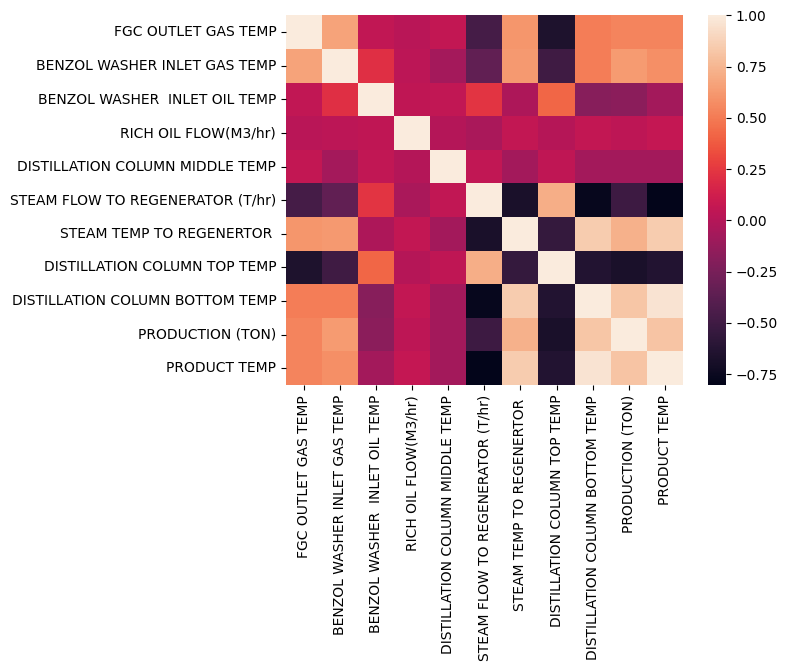

In [214]:
sns.heatmap(df.corr())

In [215]:
(df.corr() > 0.7)["PRODUCTION (TON)"] 

FGC OUTLET GAS TEMP                 False
BENZOL WASHER INLET GAS TEMP        False
BENZOL WASHER  INLET OIL TEMP       False
RICH OIL FLOW(M3/hr)                False
DISTILLATION COLUMN MIDDLE TEMP     False
STEAM FLOW TO REGENERATOR (T/hr)    False
STEAM TEMP TO REGENERTOR             True
DISTILLATION COLUMN TOP TEMP        False
DISTILLATION COLUMN BOTTOM TEMP      True
PRODUCTION (TON)                     True
PRODUCT TEMP                         True
Name: PRODUCTION (TON), dtype: bool

TypeError: 'Axes' object is not subscriptable

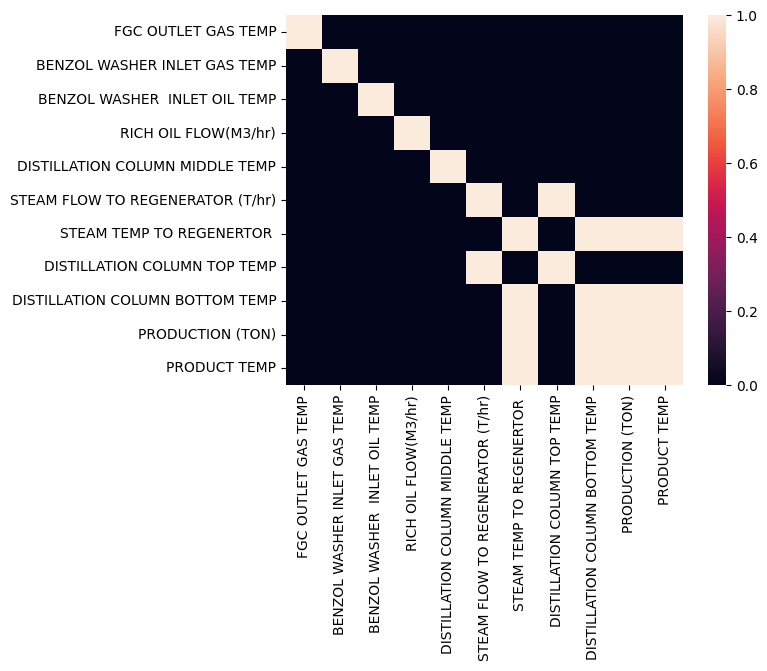

In [216]:
sns.heatmap(df.corr() > 0.7)["PRODUCTION (TON)"]

TypeError: 'Axes' object is not subscriptable

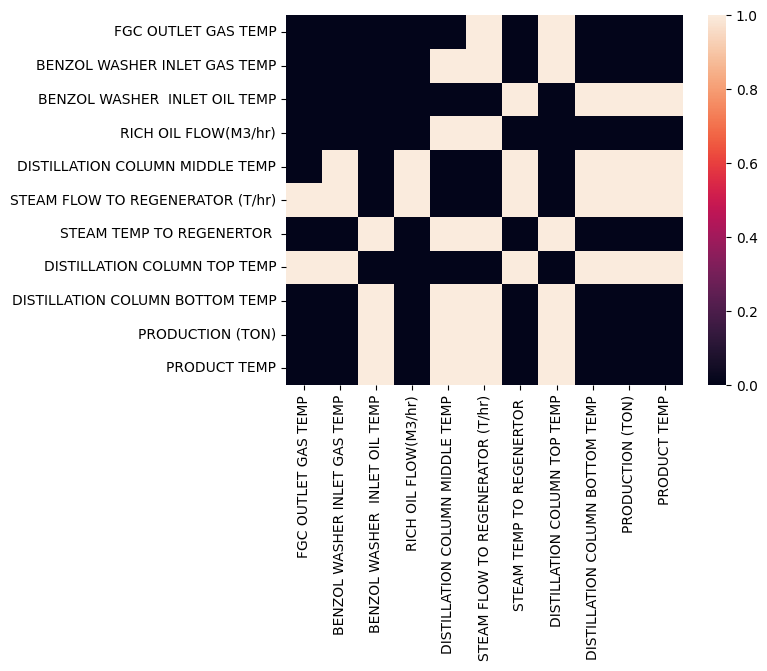

In [217]:
sns.heatmap(df.corr() < 0)["PRODUCTION (TON)"]

In [238]:
#corr > 0

correlation_threshold = 0
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df_0 = df[columns_above_threshold]




In [239]:
#corr > 0.7 

correlation_threshold = 0.7
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df1 = df[columns_above_threshold]




In [240]:
#corr > 0.5

correlation_threshold = 0.5
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production > correlation_threshold].index

df2 = df[columns_above_threshold]




In [241]:
df1.skew()

STEAM TEMP TO REGENERTOR          -0.839742
DISTILLATION COLUMN BOTTOM TEMP   -0.985459
PRODUCTION (TON)                  -0.999149
PRODUCT TEMP                      -0.981726
dtype: float64

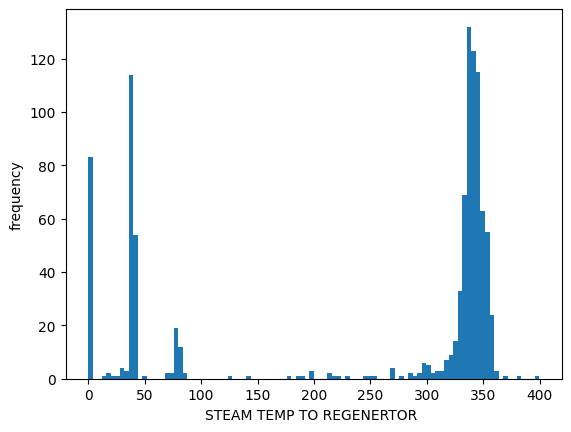

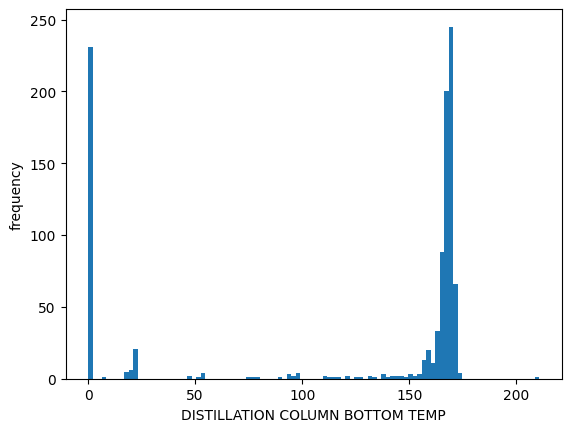

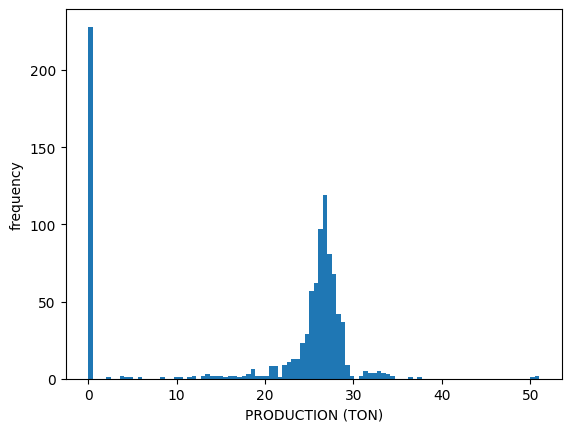

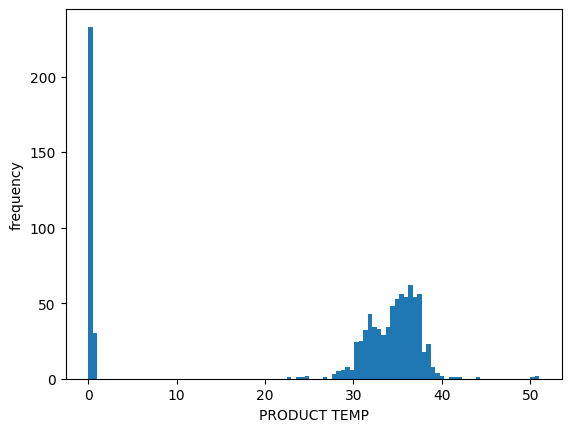

In [242]:
for i in df1 :
    plt.hist(df1[i],bins = 100)
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

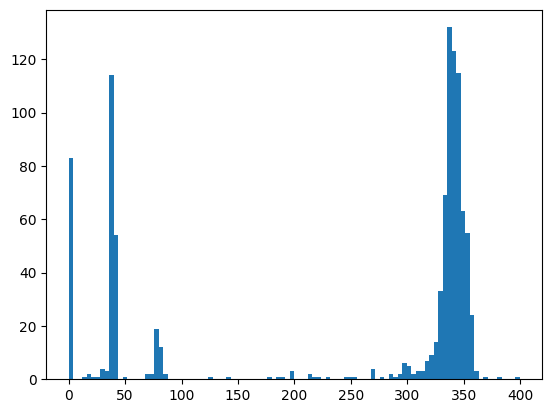

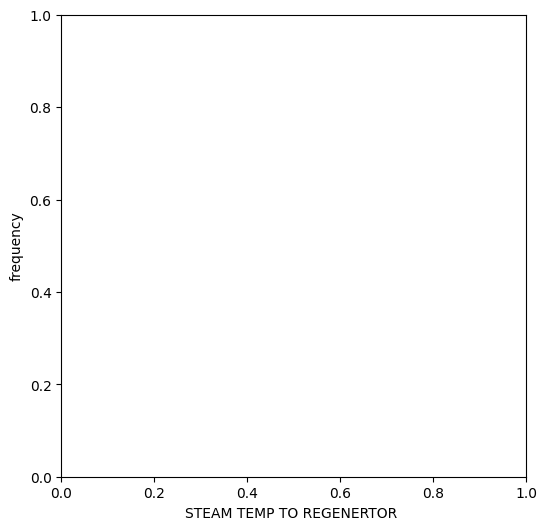

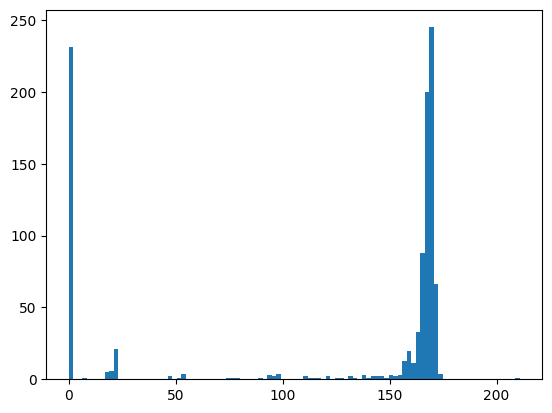

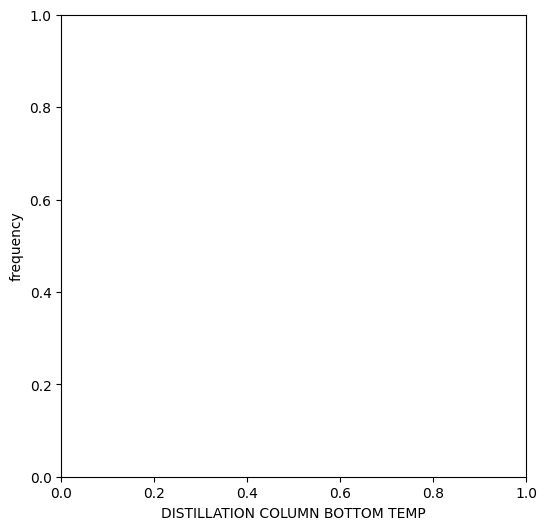

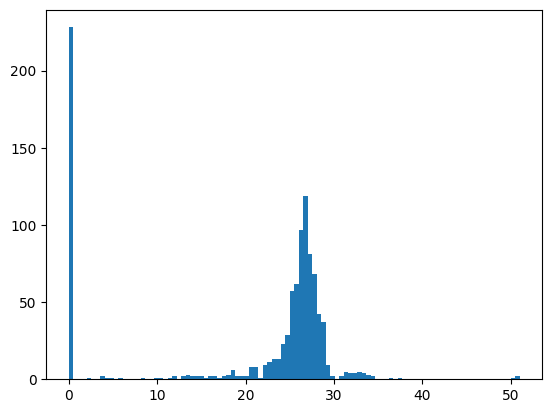

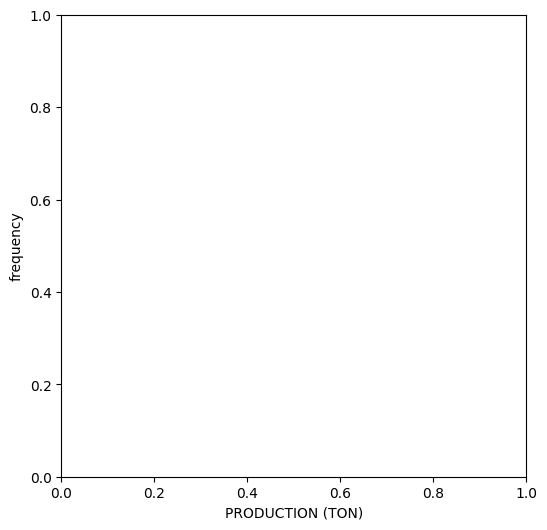

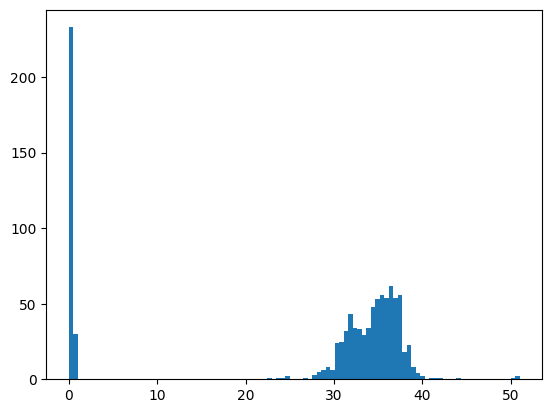

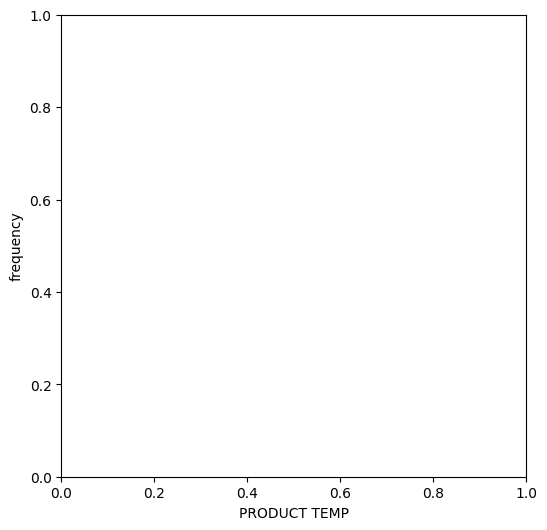

In [243]:
df3 = np.power(df1,3)
for i in df3 :
    plt.hist(df[i],bins = 100)
    plt.figure(figsize=(6,6))
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

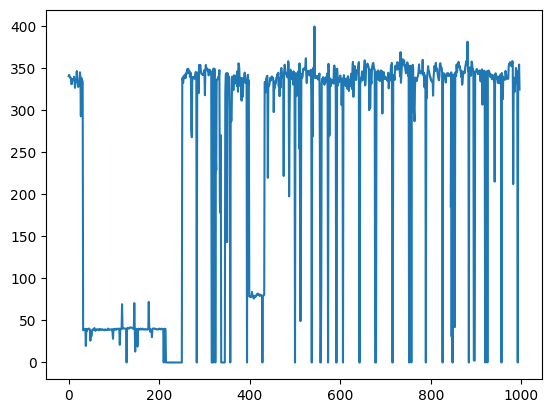

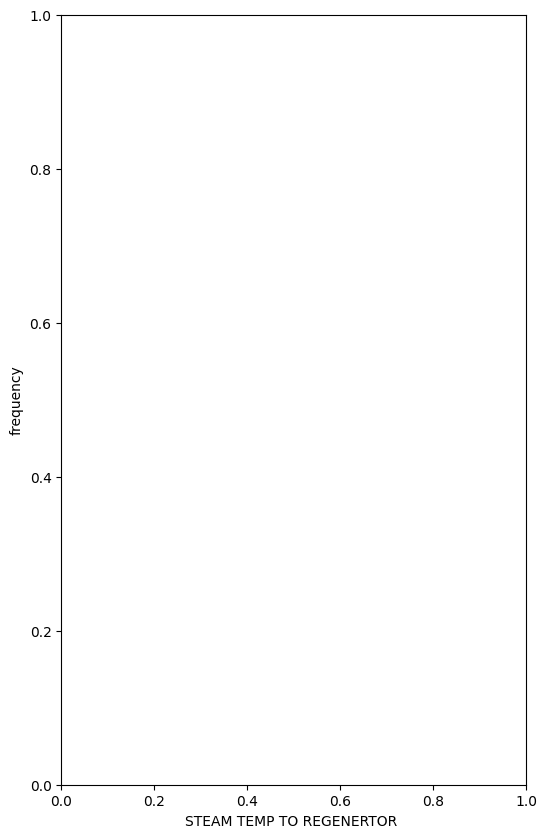

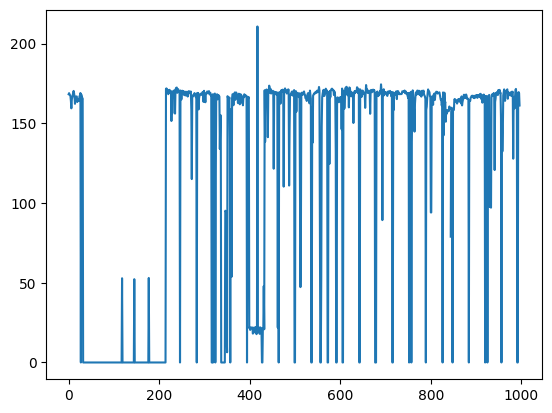

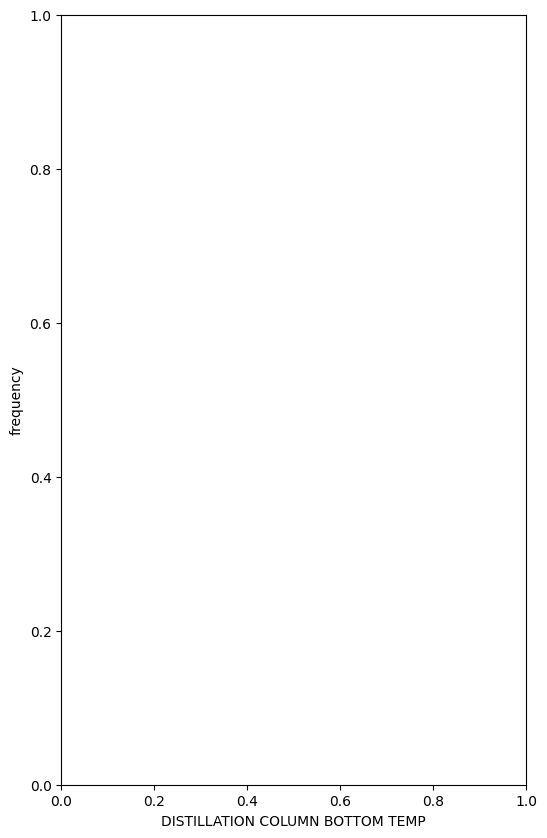

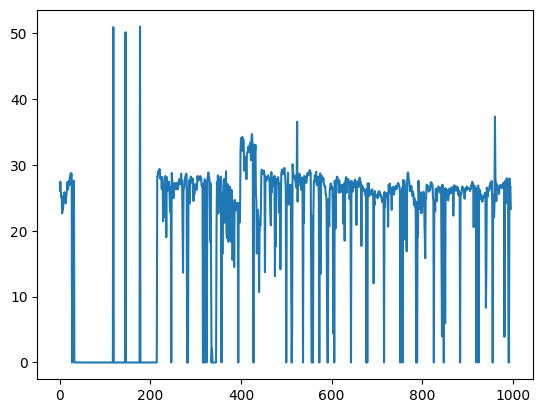

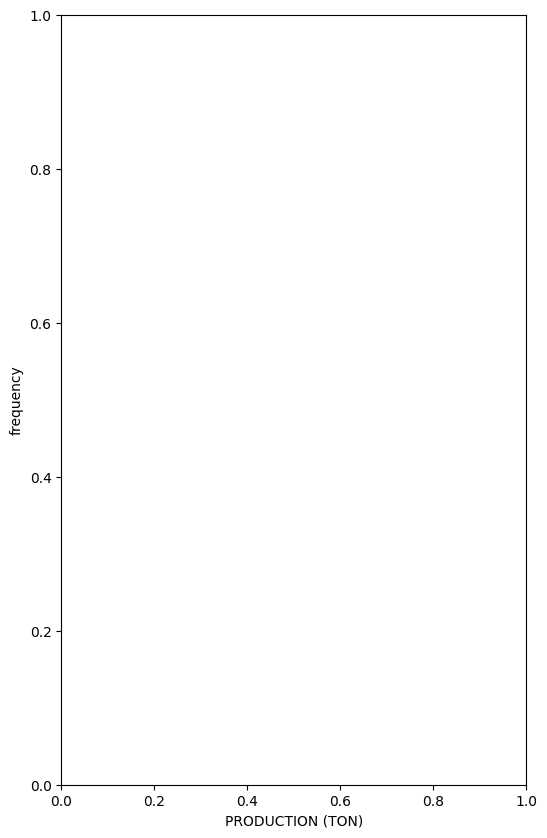

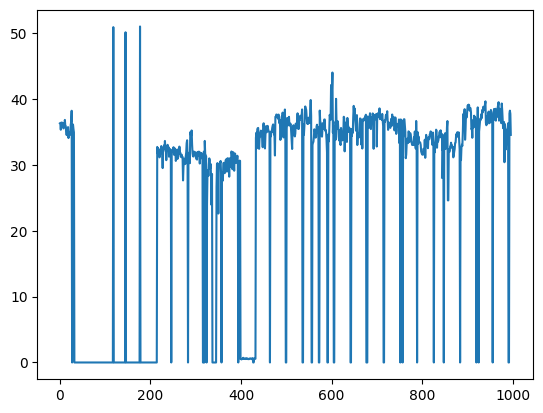

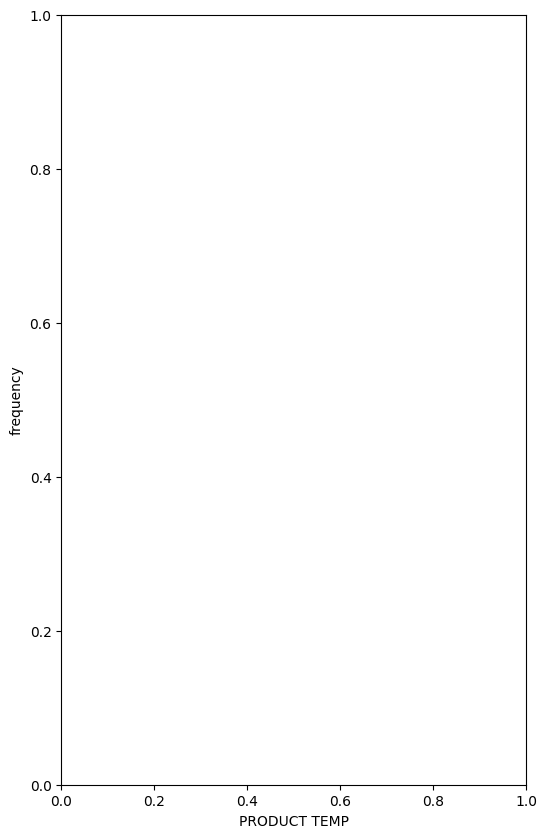

In [244]:
df3 = np.power(df1,3)
for i in df3 :
    plt.plot(df[i])
    plt.figure(figsize=(6,10))
    plt.xlabel(i)
    plt.ylabel("frequency")
    plt.show()

In [245]:
df3.skew()

STEAM TEMP TO REGENERTOR          -0.690996
DISTILLATION COLUMN BOTTOM TEMP   -0.832039
PRODUCTION (TON)                   3.065081
PRODUCT TEMP                      -0.215274
dtype: float64

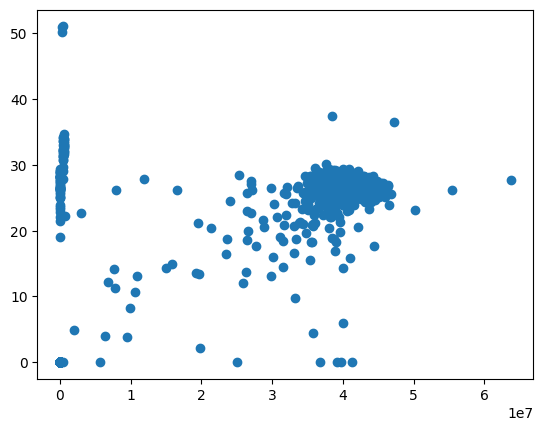

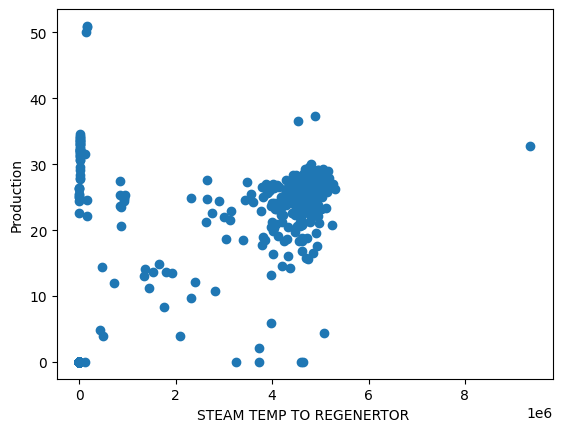

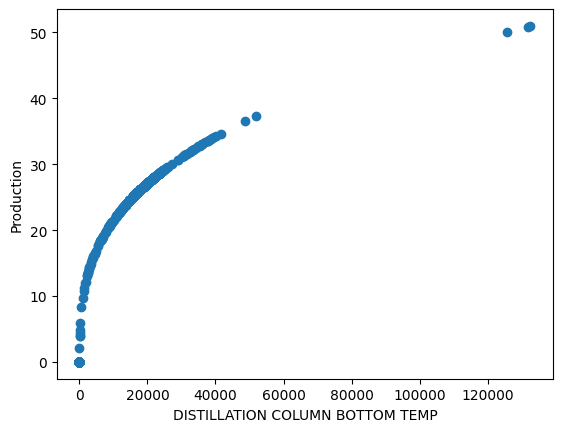

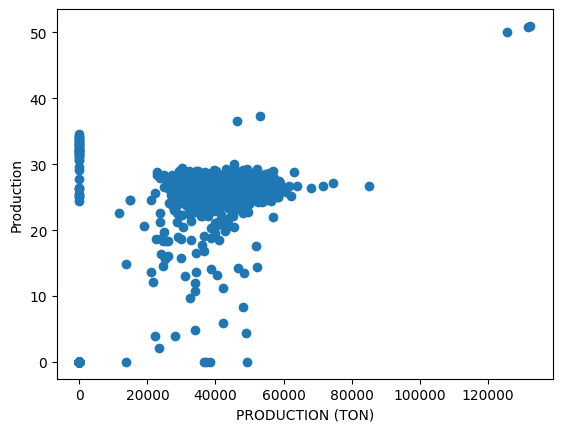

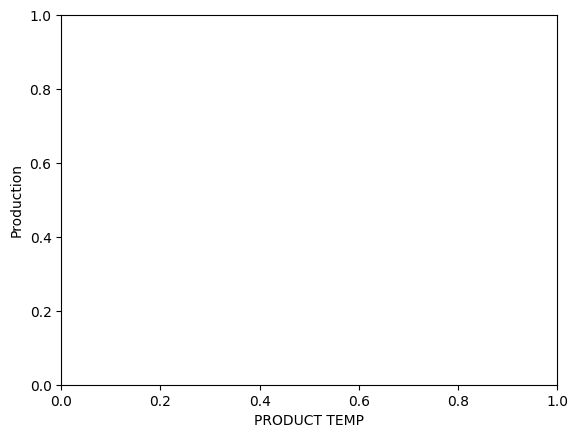

In [246]:


for i in df3 :
    plt.scatter(x = df3[i] , y = df["PRODUCTION (TON)"])
    plt.show()
    plt.xlabel(i)
    plt.ylabel("Production")

In [247]:
X = df1.iloc[1:,[0,1,3]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)




# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)

Decision Tree - Mean Squared Error: 22.620385007842078
Decision Tree - R^2 Score: 0.8088977299854465


In [248]:
#corr < 0

correlation_threshold = 0
correlation_with_production = df.corr()["PRODUCTION (TON)"]
columns_above_threshold = correlation_with_production[correlation_with_production < correlation_threshold].index

df4 = df[columns_above_threshold]




In [249]:
df4.skew()

BENZOL WASHER  INLET OIL TEMP       -0.228271
DISTILLATION COLUMN MIDDLE TEMP     29.929775
STEAM FLOW TO REGENERATOR (T/hr)     1.838713
DISTILLATION COLUMN TOP TEMP         1.482612
dtype: float64

In [250]:
df4.iloc[1:,1] = np.power(df4.iloc[1:,1],0.5)

C:\Users\tanmay pandey\AppData\Local\Temp\ipykernel_8432\3970279370.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.iloc[1:,1] = np.power(df4.iloc[1:,1],0.5)


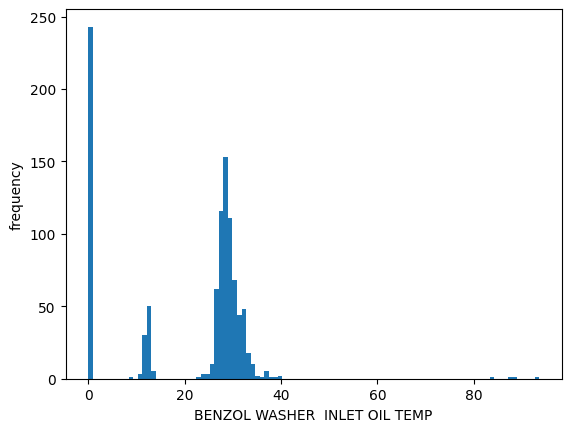

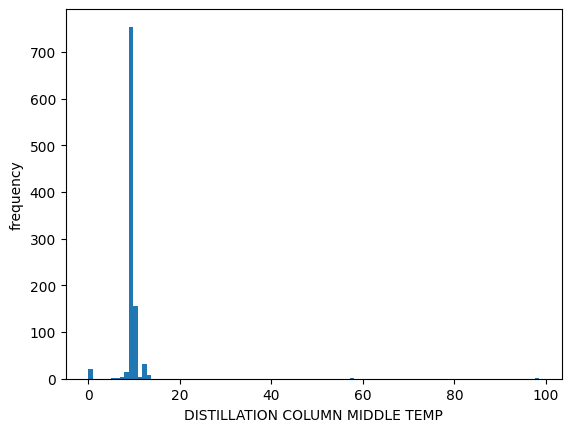

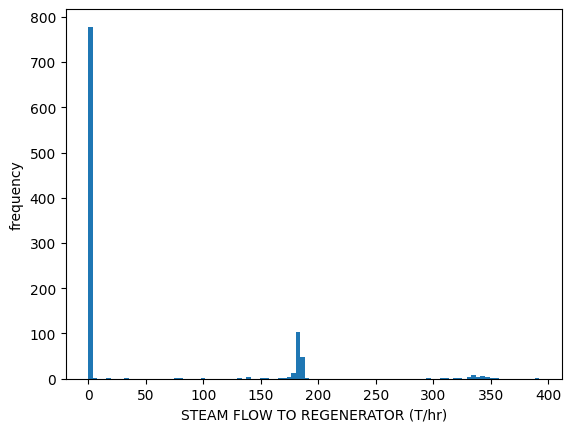

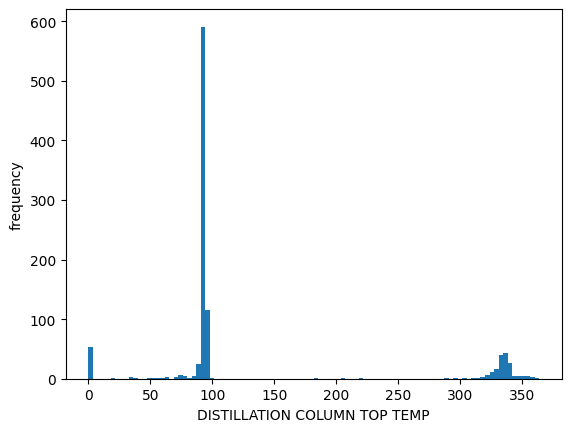

In [251]:
for i in df4 :
    plt.hist(df4[i],bins = 100)
    plt.xlabel(i)
    plt.ylabel("frequency")
    
    plt.show()

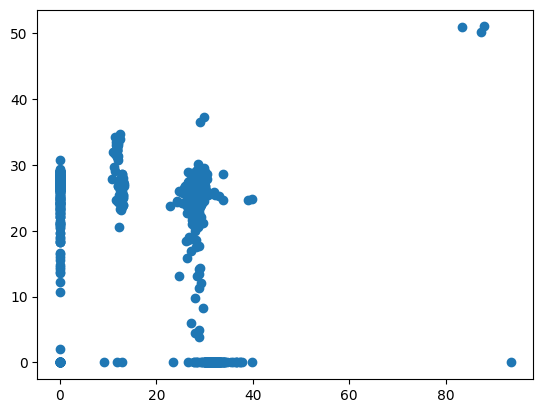

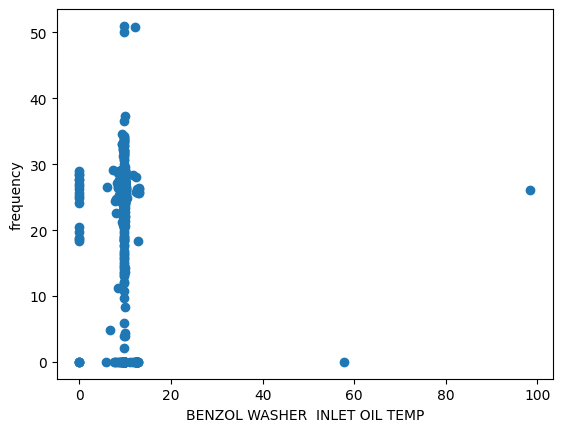

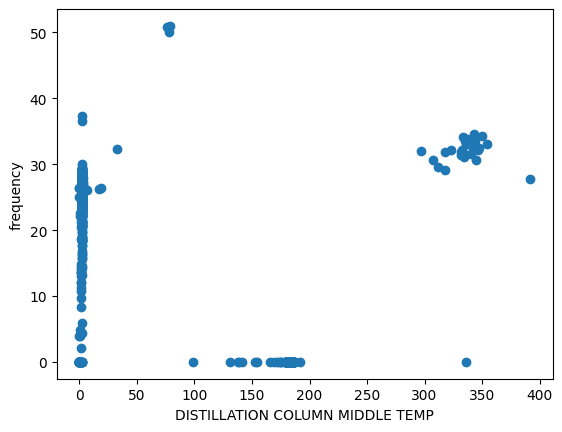

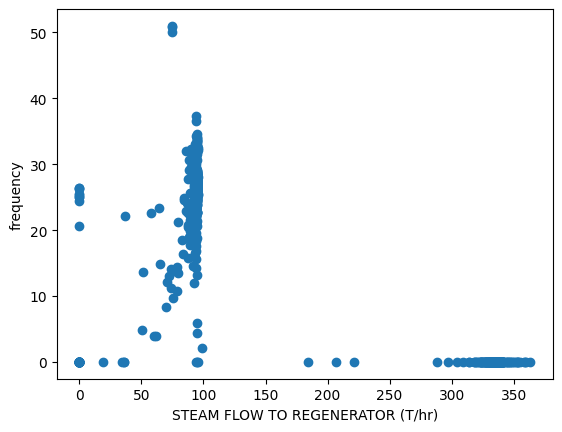

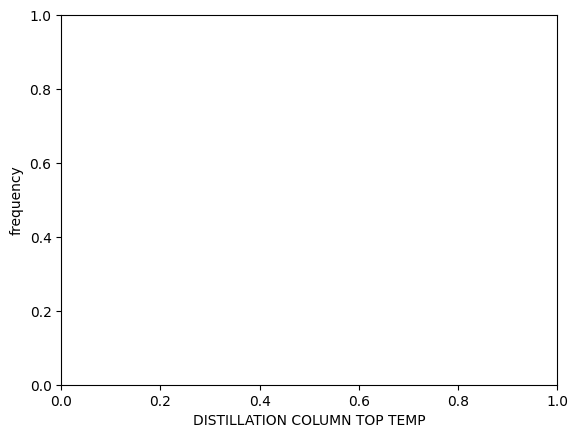

In [252]:


for i in df4 :
    plt.scatter(x = df4[i] , y = df["PRODUCTION (TON)"])
    plt.show()
    plt.xlabel(i)
    plt.ylabel("frequency")

In [253]:
X = df4.iloc[1:,[0,1,2,3]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)




# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)

Decision Tree - Mean Squared Error: 16.740889381678226
Decision Tree - R^2 Score: 0.8585690755576383


In [254]:
df2

,FGC OUTLET GAS TEMP,BENZOL WASHER INLET GAS TEMP,STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP
0,18.674059,27.58,340.52,168.22,26.09,36.29
1,27.580000,27.39,341.95,168.92,27.43,36.20
2,27.390000,27.59,339.89,168.18,26.01,35.32
3,27.590000,28.11,338.70,167.70,25.11,36.40
4,28.110000,28.60,339.00,167.00,25.29,36.30
...,...,...,...,...,...,...
992,18.674059,0.00,0.00,0.00,0.00,0.00
993,18.674059,29.70,339.77,168.71,27.91,37.77
994,18.674059,29.71,339.78,169.56,26.33,38.21
995,18.674059,29.62,354.16,168.84,26.75,37.73


In [255]:
df2.skew()

FGC OUTLET GAS TEMP               -0.713532
BENZOL WASHER INLET GAS TEMP      -0.416311
STEAM TEMP TO REGENERTOR          -0.839742
DISTILLATION COLUMN BOTTOM TEMP   -0.985459
PRODUCTION (TON)                  -0.999149
PRODUCT TEMP                      -0.981726
dtype: float64

In [256]:
df5 = np.power(df2,-5)

In [257]:
df5.skew()

FGC OUTLET GAS TEMP               NaN
BENZOL WASHER INLET GAS TEMP      NaN
STEAM TEMP TO REGENERTOR          NaN
DISTILLATION COLUMN BOTTOM TEMP   NaN
PRODUCTION (TON)                  NaN
PRODUCT TEMP                      NaN
dtype: float64

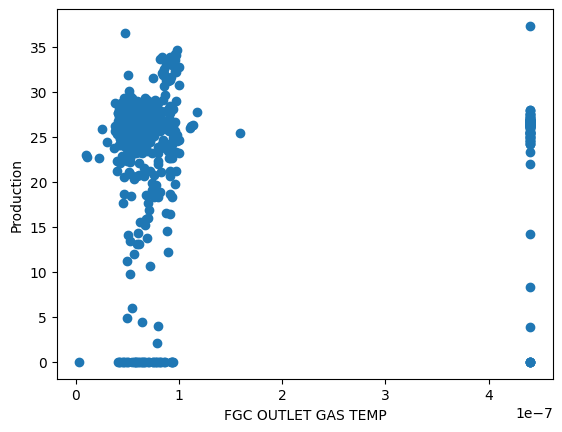

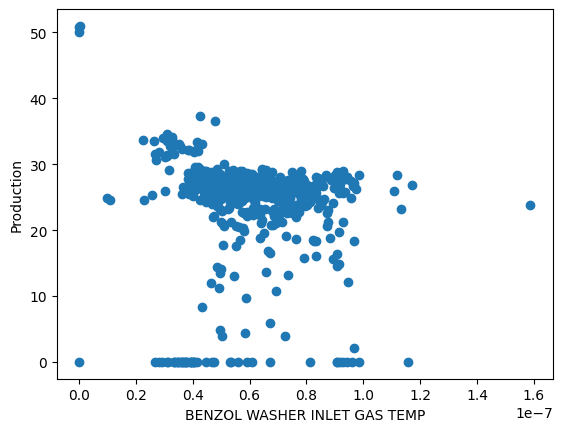

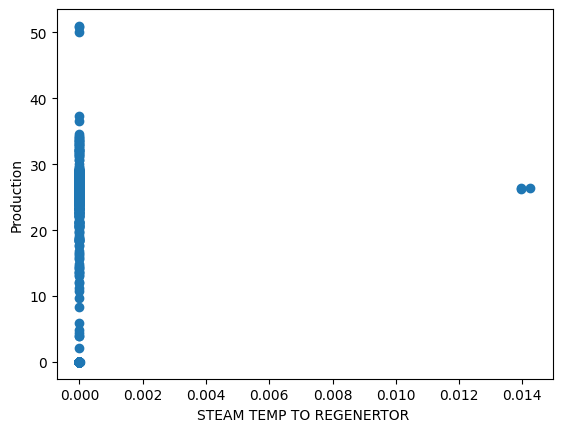

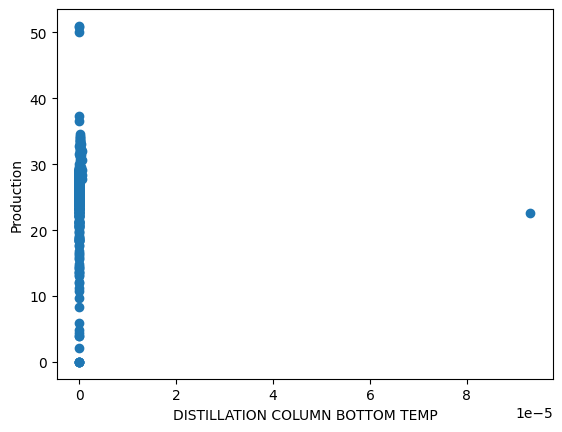

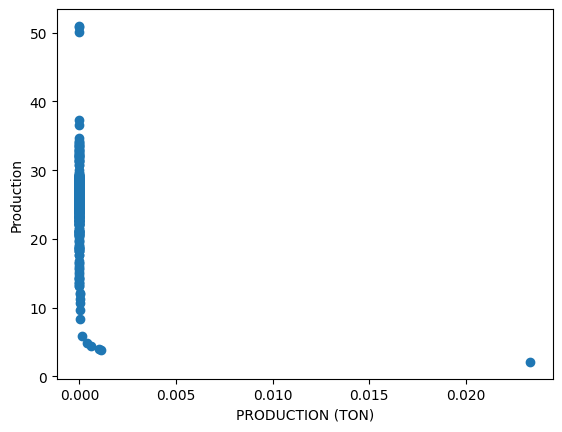

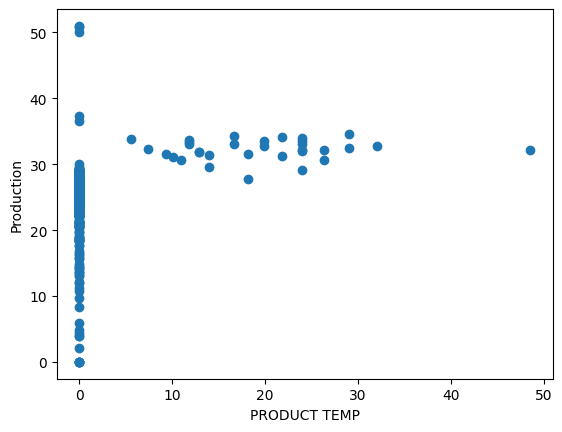

In [258]:


for i in df5 :
    plt.scatter(x = df5[i] , y = df["PRODUCTION (TON)"])
    plt.xlabel(i)
    plt.ylabel("Production")
    plt.show()

In [259]:
X = df2.iloc[1:,[0,1,2,3,5]]
X[X == '.1.83'] = np.nan


y = df1.iloc[1:,2]
y[y == '.1.83'] = np.nan

# Convert X to float array
X = X.astype(float)



# Convert y to float array
y = y.astype(float)



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)




# Create a Decision Tree Regressor model
dt_model = DecisionTreeRegressor()

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Predict on the testing data
dt_y_pred = dt_model.predict(X_test)

dt_mse = mean_squared_error(y_test, dt_y_pred)
dt_r2 = r2_score(y_test, dt_y_pred)



print("Decision Tree - Mean Squared Error:", dt_mse)
print("Decision Tree - R^2 Score:", dt_r2)

Decision Tree - Mean Squared Error: 26.027628000000004
Decision Tree - R^2 Score: 0.780112549270493


In [263]:
(df.corr())["PRODUCTION (TON)"]

FGC OUTLET GAS TEMP                 0.536683
BENZOL WASHER INLET GAS TEMP        0.627462
BENZOL WASHER  INLET OIL TEMP      -0.173520
RICH OIL FLOW(M3/hr)                0.037240
DISTILLATION COLUMN MIDDLE TEMP    -0.075950
STEAM FLOW TO REGENERATOR (T/hr)   -0.512675
STEAM TEMP TO REGENERTOR            0.728708
DISTILLATION COLUMN TOP TEMP       -0.682323
DISTILLATION COLUMN BOTTOM TEMP     0.820735
PRODUCTION (TON)                    1.000000
PRODUCT TEMP                        0.810816
Name: PRODUCTION (TON), dtype: float64

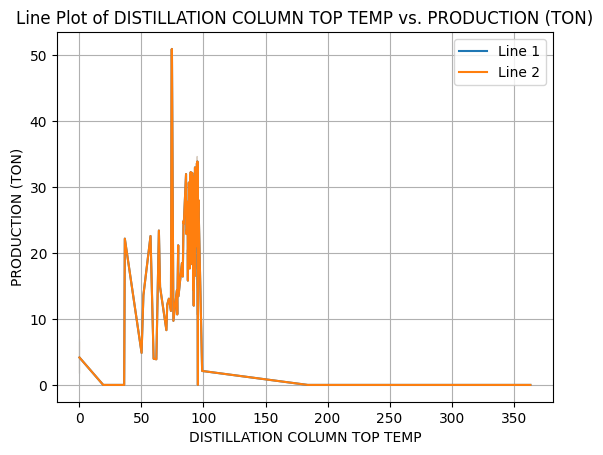

In [267]:

# Create the first line plot
sns.lineplot(x=df["DISTILLATION COLUMN TOP TEMP"], y=df["PRODUCTION (TON)"], label="Line 1")

# Create the second line plot
sns.lineplot(x=df["DISTILLATION COLUMN TOP TEMP"], y=df["PRODUCTION (TON)"], label="Line 2")  # Replace 'second_dataset' with your actual data

plt.xlabel("DISTILLATION COLUMN TOP TEMP")
plt.ylabel("PRODUCTION (TON)")
plt.title("Line Plot of DISTILLATION COLUMN TOP TEMP vs. PRODUCTION (TON)")

# Add a legend to differentiate between the two lines
plt.legend()

plt.grid(True)  # Optionally, add gridlines
plt.show()

In [268]:
max(df["PRODUCTION (TON)"])

50.99

In [272]:
df6 = df[(df["PRODUCTION (TON)"] > 15) & (df["PRODUCTION (TON)"] < 33)]


In [273]:
df6.head()

,FGC OUTLET GAS TEMP,BENZOL WASHER INLET GAS TEMP,BENZOL WASHER INLET OIL TEMP,RICH OIL FLOW(M3/hr),DISTILLATION COLUMN MIDDLE TEMP,STEAM FLOW TO REGENERATOR (T/hr),STEAM TEMP TO REGENERTOR,DISTILLATION COLUMN TOP TEMP,DISTILLATION COLUMN BOTTOM TEMP,PRODUCTION (TON),PRODUCT TEMP
0,18.674059,27.58,27.58,65.39,98.490667,2.41,340.52,94.27,168.22,26.09,36.29
1,27.580000,27.39,27.39,65.58,97.120000,2.41,341.95,94.30,168.92,27.43,36.20
2,27.390000,27.59,27.59,65.43,99.590000,2.40,339.89,94.29,168.18,26.01,35.32
3,27.590000,28.11,28.11,65.46,97.030000,2.33,338.70,94.03,167.70,25.11,36.40
4,28.110000,28.60,28.60,65.09,95.600000,2.37,339.00,94.30,167.00,25.29,36.30


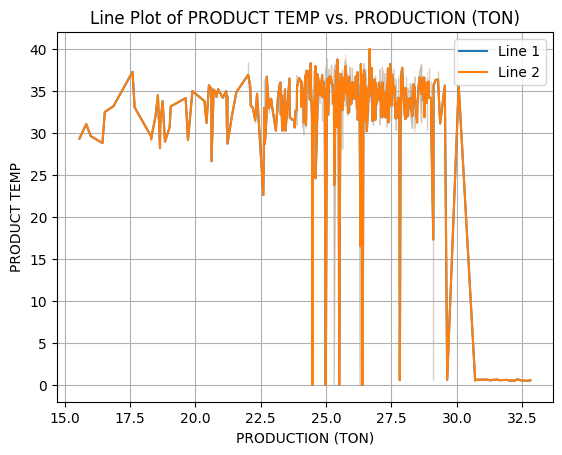

In [275]:

# Create the first line plot
sns.lineplot(x=df["PRODUCTION (TON)"], y=df["PRODUCT TEMP"], label="Line 1")

# Create the second line plot
#sns.lineplot(x=df["PRODUCTION (TON)"], y=df["PRODUCT TEMP"], label="Line 2")  # Replace 'second_dataset' with your actual data

plt.xlabel("PRODUCTION (TON)")
plt.ylabel("PRODUCT TEMP")
plt.title("Line Plot of PRODUCT TEMP vs. PRODUCTION (TON)")

# Add a legend to differentiate between the two lines
plt.legend()

plt.grid(True)  # Optionally, add gridlines
plt.show()